In [4]:
# Cell 1: Import library yang diperlukan
import numpy as np  # Linear algebra
import pandas as pd  # Data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Advanced visualization

from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.model_selection import cross_val_score, GridSearchCV  # Cross-validation
from sklearn import preprocessing  # Preprocessing

from xgboost import XGBClassifier  # XGBoost model
import lightgbm as lgb  # LightGBM model (tambahan untuk ensemble)
from sklearn.ensemble import RandomForestClassifier, VotingClassifier  # Ensemble methods

# Import metrik evaluasi yang masih tersedia di sklearn terbaru
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    classification_report,
    ConfusionMatrixDisplay  # Alternatif plot_confusion_matrix
)

In [5]:
df = pd.read_csv('dataset/kaggle_bot_accounts.csv')

In [6]:
df.head()

,Unnamed: 0,NAME,GENDER,EMAIL_ID,IS_GLOGIN,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,REGISTRATION_IPV4,REGISTRATION_LOCATION,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC,ISBOT
0,0,Johnny KerrThomas,Male,jacksonalan@example.com,False,53.0,87.0,5.0,3.0,124.0,NaN,81.88.75.170,Argentina,16.0,10.0,3.0,NaN
1,1,Dwayne LarsenLara,Male,calvin80@example.com,True,16.0,67.0,5.0,NaN,26.0,24.97,NaN,New Zealand,14.0,5.0,2.0,NaN
2,2,NaN,Male,qbrown@example.net,True,44.0,81.0,4.0,17.0,125.0,7.75,159.202.103.178,Costa Rica,16.0,4.0,0.0,False
3,3,Russell SimmonsPhillips,Male,kimberlywagner@example.com,True,23.0,114.0,5.0,24.0,67.0,13.40,196.11.132.51,Italy,21.0,10.0,1.0,False
4,4,Jamie WilsonMartinez,Female,shaunbrooks@example.com,False,46.0,112.0,2.0,12.0,63.0,24.83,159.196.199.20,Belgium,10.0,6.0,2.0,False


In [7]:
df.shape

(1321188, 17)

In [8]:
df.columns= df.columns.str.lower()

In [9]:
# Cell 6: EDA - Melihat informasi dasar
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321188 entries, 0 to 1321187
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   unnamed: 0             1321188 non-null  int64  
 1   name                   1243024 non-null  object 
 2   gender                 1243309 non-null  object 
 3   email_id               1243374 non-null  object 
 4   is_glogin              1243272 non-null  object 
 5   follower_count         1243476 non-null  float64
 6   following_count        1242743 non-null  float64
 7   dataset_count          1242621 non-null  float64
 8   code_count             1243262 non-null  float64
 9   discussion_count       1243466 non-null  float64
 10  avg_nb_read_time_min   1242872 non-null  float64
 11  registration_ipv4      1242859 non-null  object 
 12  registration_location  1242898 non-null  object 
 13  total_votes_gave_nb    1243483 non-null  float64
 14 

In [10]:
# Cell 7: EDA - Statistik deskriptif
df.describe()

,unnamed: 0,follower_count,following_count,dataset_count,code_count,discussion_count,avg_nb_read_time_min,total_votes_gave_nb,total_votes_gave_ds,total_votes_gave_dc
count,1.321188e+06,1.243476e+06,1.242743e+06,1.242621e+06,1.243262e+06,1.243466e+06,1.242872e+06,1.243483e+06,1.243254e+06,1.243158e+06
mean,6.605935e+05,2.698273e+01,4.505091e+01,2.562564e+00,1.038450e+01,6.584244e+01,1.274225e+01,1.750656e+01,6.501007e+00,1.500373e+00
std,3.813943e+05,2.300504e+01,3.947716e+01,2.499882e+00,8.248055e+00,4.754315e+01,9.564920e+00,4.611783e+00,2.290951e+00,1.118067e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,3.000000e+00,0.000000e+00
25%,3.302968e+05,2.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.300000e+01,1.870000e+00,1.400000e+01,5.000000e+00,1.000000e+00
50%,6.605935e+05,2.400000e+01,3.900000e+01,2.000000e+00,1.000000e+01,6.500000e+01,1.229000e+01,1.800000e+01,7.000000e+00,2.000000e+00
75%,9.908902e+05,4.700000e+01,8.000000e+01,5.000000e+00,1.800000e+01,1.080000e+02,2.119000e+01,2.200000e+01,9.000000e+00,3.000000e+00
max,1.321187e+06,7.000000e+01,1.200000e+02,7.000000e+00,2.500000e+01,1.500000e+02,2.999000e+01,2.500000e+01,1.000000e+01,3.000000e+00


In [11]:
# Cell 8: EDA - Memeriksa nilai yang hilang
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang di setiap kolom:")
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

Jumlah nilai yang hilang di setiap kolom:
unnamed: 0                   0
name                     78164
gender                   77879
email_id                 77814
is_glogin                77916
follower_count           77712
following_count          78445
dataset_count            78567
code_count               77926
discussion_count         77722
avg_nb_read_time_min     78316
registration_ipv4        78329
registration_location    78290
total_votes_gave_nb      77705
total_votes_gave_ds      77934
total_votes_gave_dc      78030
isbot                    78500
dtype: int64

Total missing values: 1249249


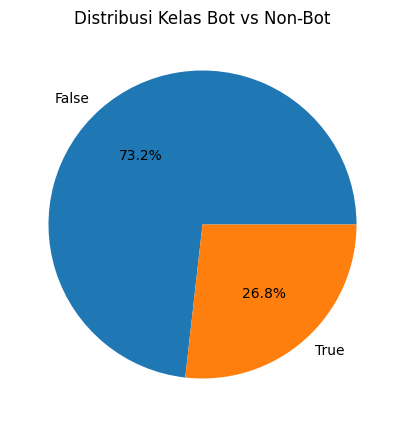

Distribusi kelas target:
isbot
False    909794
True     332894
Name: count, dtype: int64
Rasio: 2.73:1


In [12]:
# Cell 9: EDA - Distribusi kelas target 
plt.figure(figsize=(8, 5))
target_counts = df['isbot'].value_counts()
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Distribusi Kelas Bot vs Non-Bot')
plt.show()

print(f"Distribusi kelas target:\n{target_counts}")
print(f"Rasio: {target_counts.iloc[0]/target_counts.iloc[1]:.2f}:1")

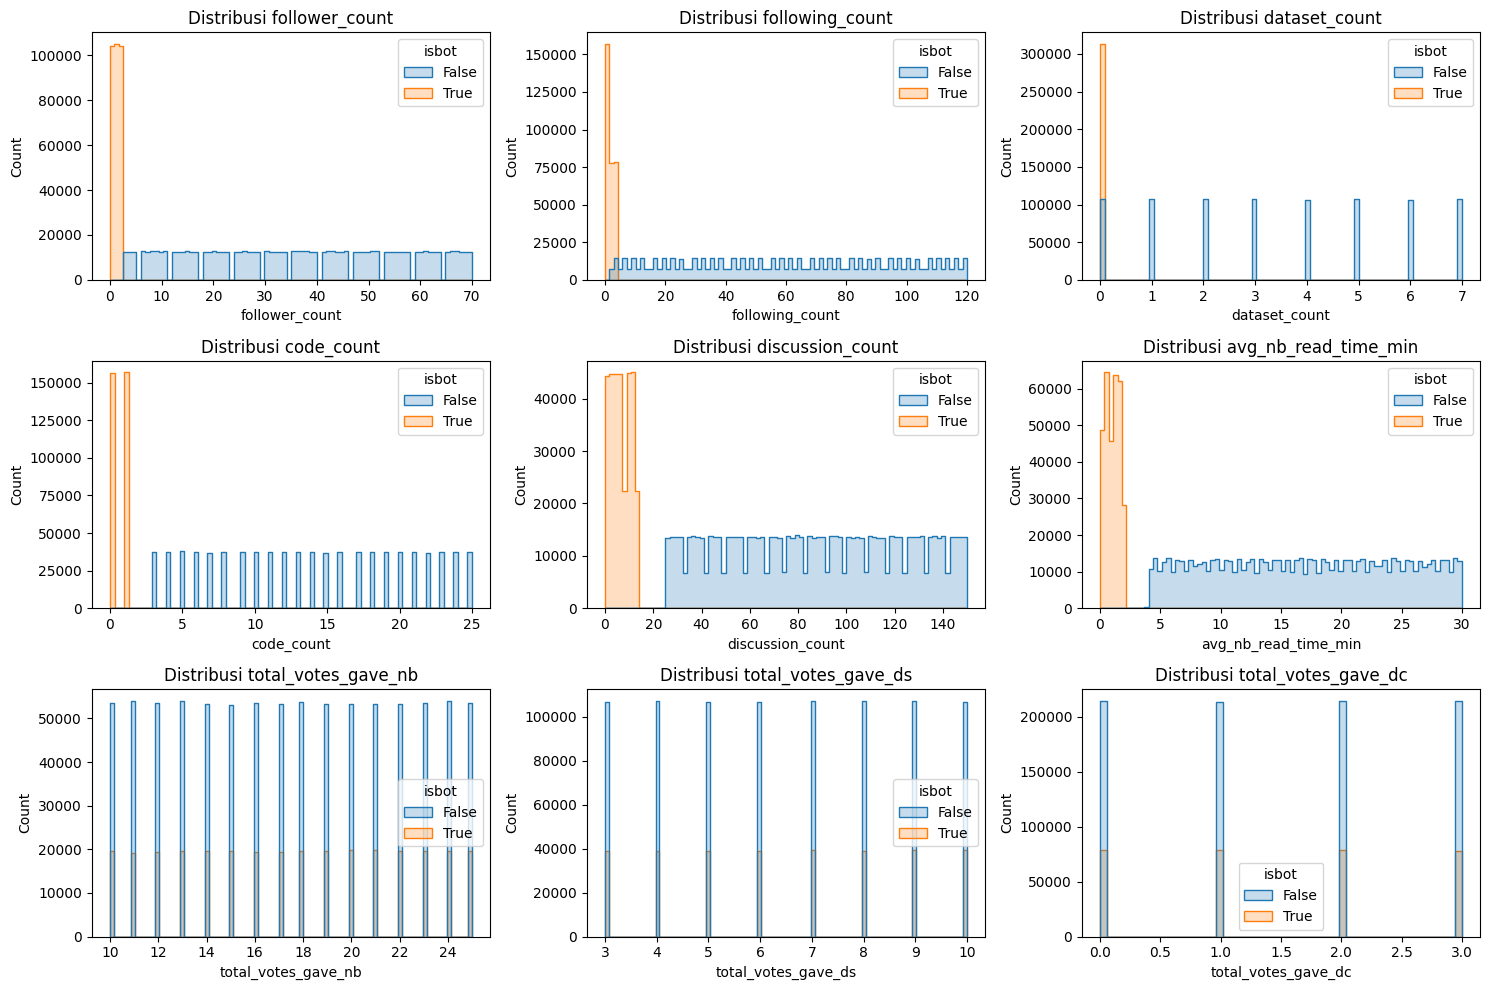

In [13]:
# Cell 10: EDA - Visualisasi fitur numerik
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features = [col for col in numeric_features if col != 'unnamed: 0']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=feature, hue='isbot', element='step', common_norm=False)
    plt.title(f'Distribusi {feature}')
plt.tight_layout()
plt.show()

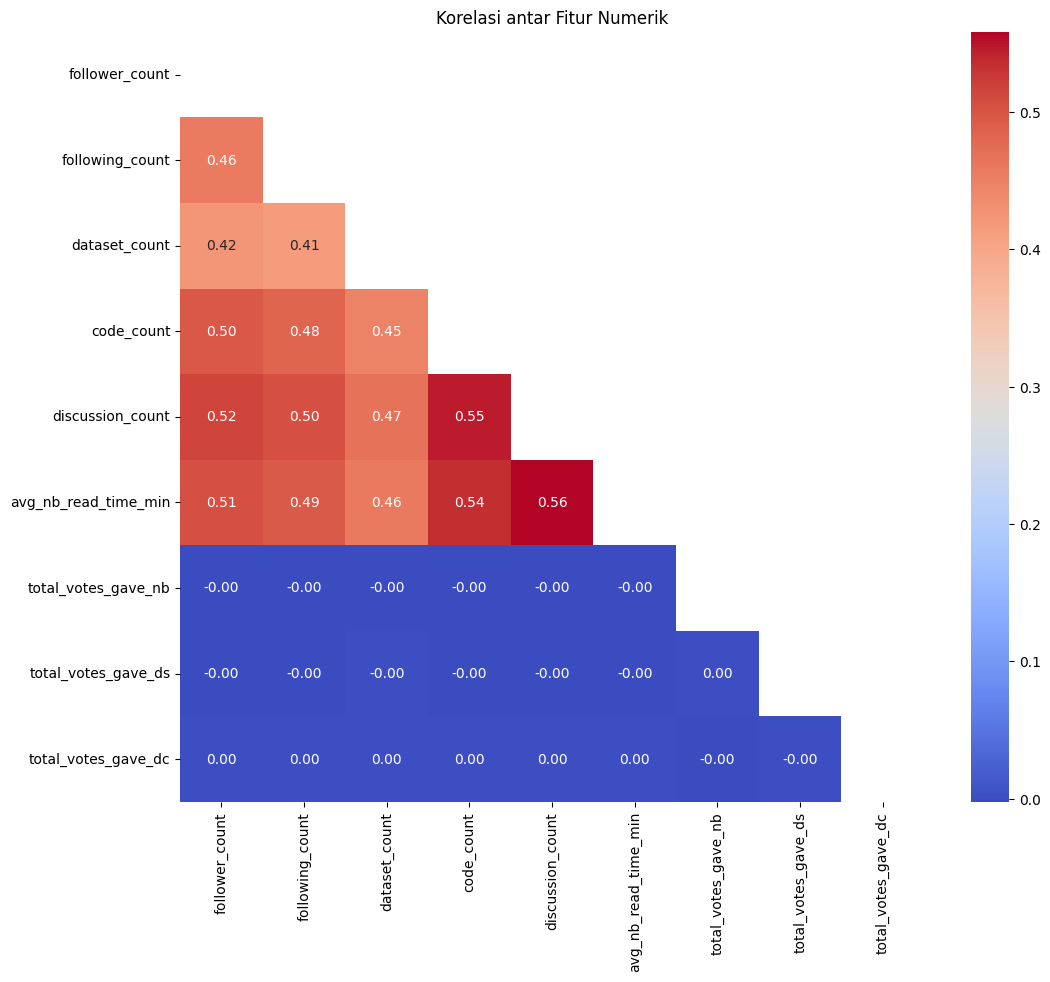

In [14]:
# Cell 11: EDA - Korelasi antar fitur numerik
plt.figure(figsize=(12, 10))
numeric_df = df[numeric_features]
correlation = numeric_df.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
plt.title('Korelasi antar Fitur Numerik')
plt.show()

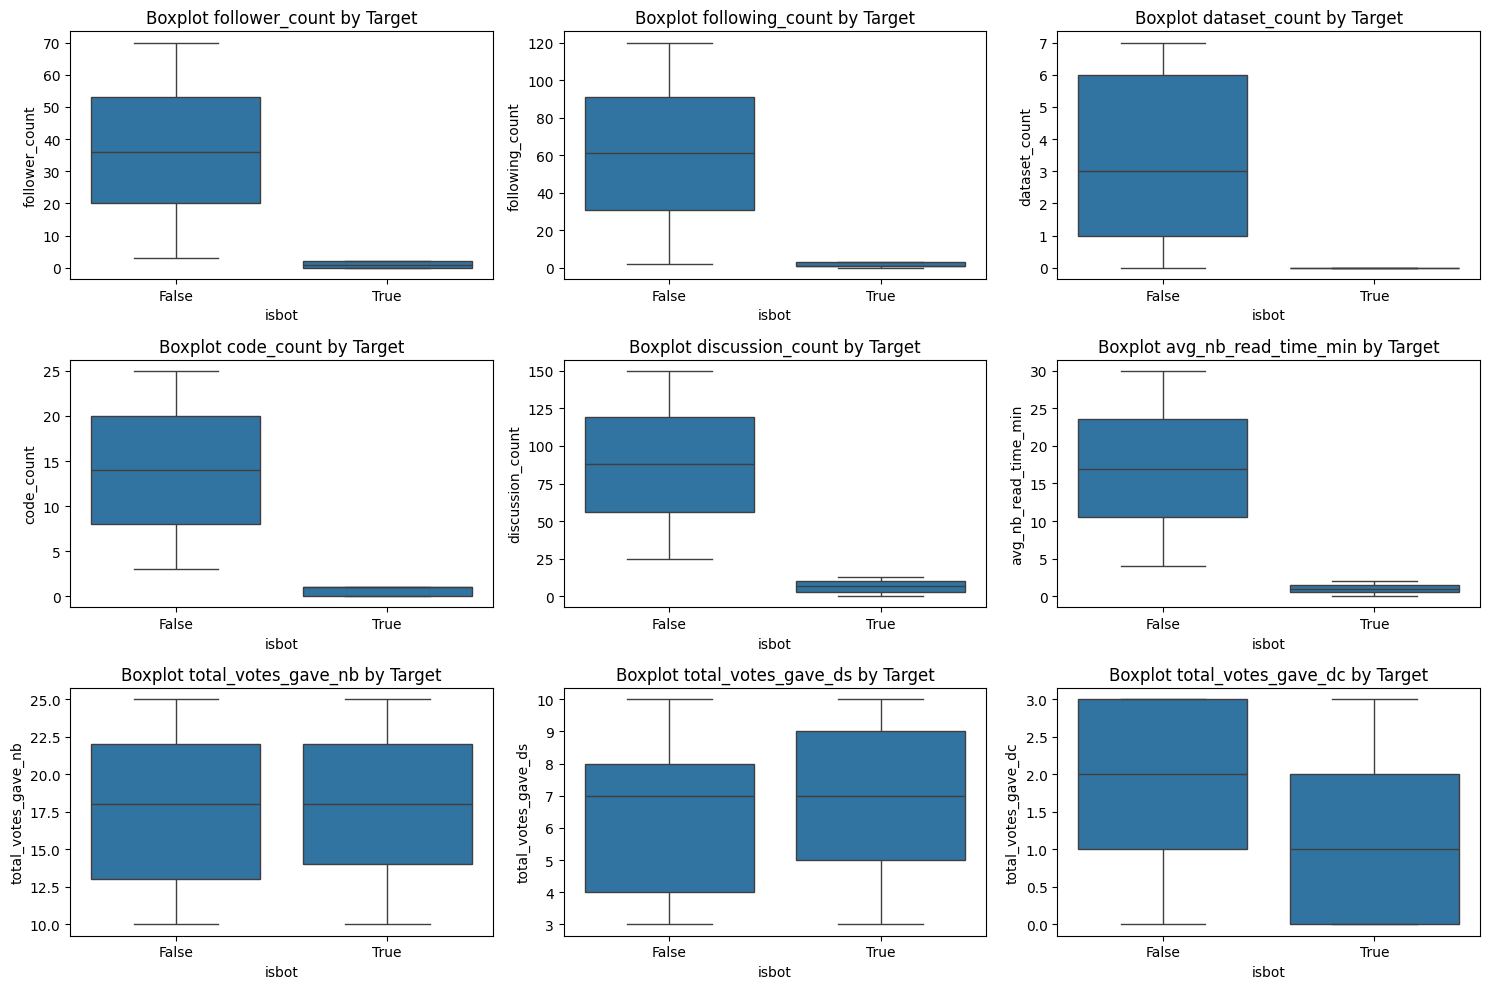

In [15]:
# Cell 12: EDA - Boxplot untuk outlier detection 
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    if feature != 'unnamed: 0':
        plt.subplot(3, 3, i)
        sns.boxplot(data=df, y=feature, x='isbot')
        plt.title(f'Boxplot {feature} by Target')
plt.tight_layout()
plt.show()

In [16]:
# Cell 13: Data preprocessing - Hapus kolom yang tidak diperlukan
# Hapus kolom yang tidak relevan untuk prediksi
df = df.drop(['unnamed: 0', 'name','email_id', 'registration_ipv4', 'registration_location'], axis=1)

In [17]:
# Cell 14: Data preprocessing - Handle missing values
# Periksa nilai yang hilang setelah drop kolom
missing_values = df.isnull().sum()
print("Nilai yang hilang setelah drop kolom:")
print(missing_values[missing_values > 0])

# Jika ada nilai yang hilang pada kolom numerik, isi dengan median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

# Hapus baris dengan nilai yang hilang pada target
df = df.dropna(axis=0, subset=['isbot'])

Nilai yang hilang setelah drop kolom:
gender                  77879
is_glogin               77916
follower_count          77712
following_count         78445
dataset_count           78567
code_count              77926
discussion_count        77722
avg_nb_read_time_min    78316
total_votes_gave_nb     77705
total_votes_gave_ds     77934
total_votes_gave_dc     78030
isbot                   78500
dtype: int64


/tmp/ipykernel_10088/3081301515.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
/tmp/ipykernel_10088/3081301515.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [18]:
# Cell 15: Data preprocessing - Hapus duplikat
# Jumlah baris sebelum drop duplikat
print(f"Jumlah baris sebelum drop duplikat: {df.shape[0]}")
df = df.drop_duplicates()
print(f"Jumlah baris setelah drop duplikat: {df.shape[0]}")

Jumlah baris sebelum drop duplikat: 1242688
Jumlah baris setelah drop duplikat: 1241758


In [19]:
# Cell 16: Data preprocessing - Feature engineering
# Menambahkan rasio pengikut/mengikuti sebagai fitur baru jika informasi tersedia
df['follower_following_ratio'] = df['follower_count'] / df['following_count'].replace(0, 0.001)

# Tambahkan fitur total aktivitas
df['total_activity'] = df['dataset_count'] + df['code_count'] + df['discussion_count']

# Tambahkan fitur rasio votes
df['total_votes'] = df['total_votes_gave_nb'] + df['total_votes_gave_ds'] + df['total_votes_gave_dc']

In [20]:
# Cell 17: Data preprocessing - Transformasi fitur kategorikal (tanpa variabel target)
# Pisahkan fitur dan target terlebih dahulu
y = df['isbot']
X = df.drop(['isbot'], axis=1)

# Encoding fitur kategorikal
X = pd.get_dummies(X, columns=['gender', 'is_glogin'], drop_first=True)

# Encode target secara terpisah (konversi ke 0/1)
y = (y == 'True').astype(int)

# Lihat hasil encoding
print("Fitur setelah encoding:")
print(X.columns.tolist())
print(f"\nBentuk X: {X.shape}")
print(f"Distribusi y: {y.value_counts()}")

Fitur setelah encoding:
['follower_count', 'following_count', 'dataset_count', 'code_count', 'discussion_count', 'avg_nb_read_time_min', 'total_votes_gave_nb', 'total_votes_gave_ds', 'total_votes_gave_dc', 'follower_following_ratio', 'total_activity', 'total_votes', 'gender_Male', 'is_glogin_True']

Bentuk X: (1241758, 14)
Distribusi y: isbot
0    1241758
Name: count, dtype: int64


In [21]:
# Cell 18: Data preprocessing - Standardisasi fitur numerik
# Standardisasi fitur numerik
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Cell 19: Split data menjadi train, validation, dan test set
# Split data menjadi tiga bagian: train, validation, dan test
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (745054, 14), y_train shape: (745054,)
X_val shape: (248352, 14), y_val shape: (248352,)
X_test shape: (248352, 14), y_test shape: (248352,)


In [23]:
# Cell 20: Fungsi untuk evaluasi model
def make_confusion_matrix(model, X_test, y_actual):
    """
    Membuat Confusion Matrix dengan heatmap.

    Parameters:
    - model : classifier yang sudah dilatih
    - X_test : dataset untuk prediksi
    - y_actual : ground truth (label asli)
    """
    # Prediksi model
    y_predict = model.predict(X_test)

    # Dapatkan label unik dari data aktual
    labels = np.unique(y_actual)

    # Hitung confusion matrix
    cm = confusion_matrix(y_actual, y_predict, labels=labels)

    # Buat label untuk heatmap
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels_display = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels_display = np.asarray(labels_display).reshape(len(labels), len(labels))

    # Buat heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=labels_display, fmt='', cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()

def get_metrics_score(model, X_train, y_train, X_test, y_test, flag=True):
    """
    Menghitung dan menampilkan metrik evaluasi untuk model klasifikasi.

    Parameters:
    - model : classifier yang sudah dilatih
    - X_train, y_train : dataset training
    - X_test, y_test : dataset testing
    - flag : jika True, mencetak hasil evaluasi. Default = True.

    Returns:
    - score_list : list berisi metrik [train_acc, test_acc, train_recall, test_recall, train_precision, test_precision]
    """
    # Prediksi model
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Menghitung metrik evaluasi
    train_acc = accuracy_score(y_train, pred_train)
    test_acc = accuracy_score(y_test, pred_test)

    train_recall = recall_score(y_train, pred_train, average='binary')
    test_recall = recall_score(y_test, pred_test, average='binary')

    train_precision = precision_score(y_train, pred_train, average='binary')
    test_precision = precision_score(y_test, pred_test, average='binary')

    # Menyimpan skor dalam list
    score_list = [train_acc, test_acc, train_recall, test_recall, train_precision, test_precision]

    # Jika flag True, tampilkan hasil
    if flag:
        print(f"🔹 Accuracy: Train = {train_acc:.4f}, Test = {test_acc:.4f}")
        print(f"🔹 Recall:   Train = {train_recall:.4f}, Test = {test_recall:.4f}")
        print(f"🔹 Precision: Train = {train_precision:.4f}, Test = {test_precision:.4f}")
        print("\n🔹 Classification Report (Test Set):")
        print(classification_report(y_test, pred_test))

    return score_list

def plot_roc_curve(model, X_test, y_test):
    """Plot ROC curve untuk model klasifikasi"""
    # Dapatkan probabilitas prediksi untuk kelas positif
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Hitung AUC score
    auc_score = roc_auc_score(y_test, y_probs)
    
    # Hitung false positive rate, true positive rate, dan threshold
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return auc_score

In [24]:
# Cell 21: Cross-validation untuk baseline model
# Baseline model dengan default parameters
xgb_base = XGBClassifier(random_state=42)

# Cross-validation untuk baseline model
cv_scores = cross_val_score(xgb_base, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}, Std: {cv_scores.std():.4f}")

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV score: 1.0000, Std: 0.0000


In [25]:
# Cell 22: Hyperparameter Tuning menggunakan GridSearchCV
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print hasil terbaik
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Dapatkan model terbaik
best_xgb = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validation score: 1.0000


/home/notsuperganang/Documents/.all/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/notsuperganang/Documents/.all/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/notsuperganang/Documents/.all/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/notsuper

🔹 Accuracy: Train = 1.0000, Test = 1.0000
🔹 Recall:   Train = 0.0000, Test = 0.0000
🔹 Precision: Train = 0.0000, Test = 0.0000

🔹 Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    248352

    accuracy                           1.00    248352
   macro avg       1.00      1.00      1.00    248352
weighted avg       1.00      1.00      1.00    248352



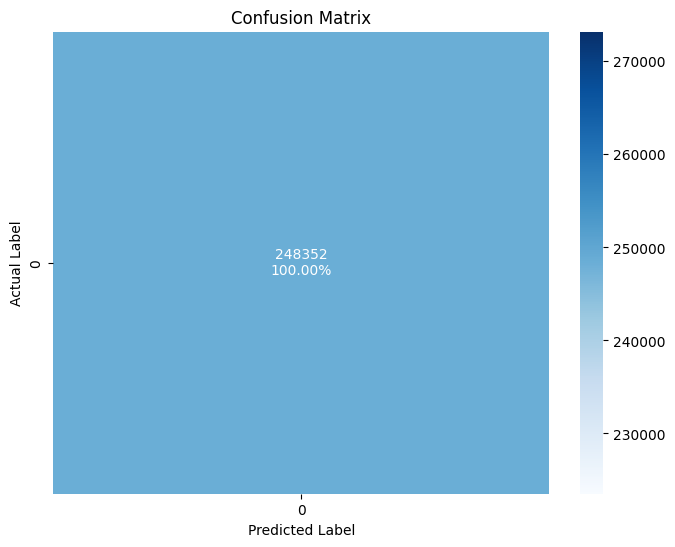

/home/notsuperganang/Documents/.all/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/home/notsuperganang/Documents/.all/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


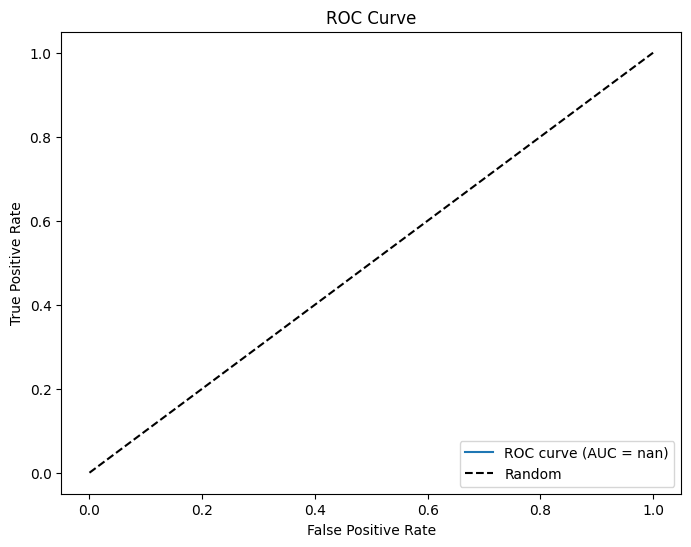

nan

In [26]:
# Cell 23: Evaluasi model terbaik dari GridSearchCV
# Evaluasi pada validation set
get_metrics_score(best_xgb, X_train, y_train, X_val, y_val)
make_confusion_matrix(best_xgb, X_val, y_val)
plot_roc_curve(best_xgb, X_val, y_val)

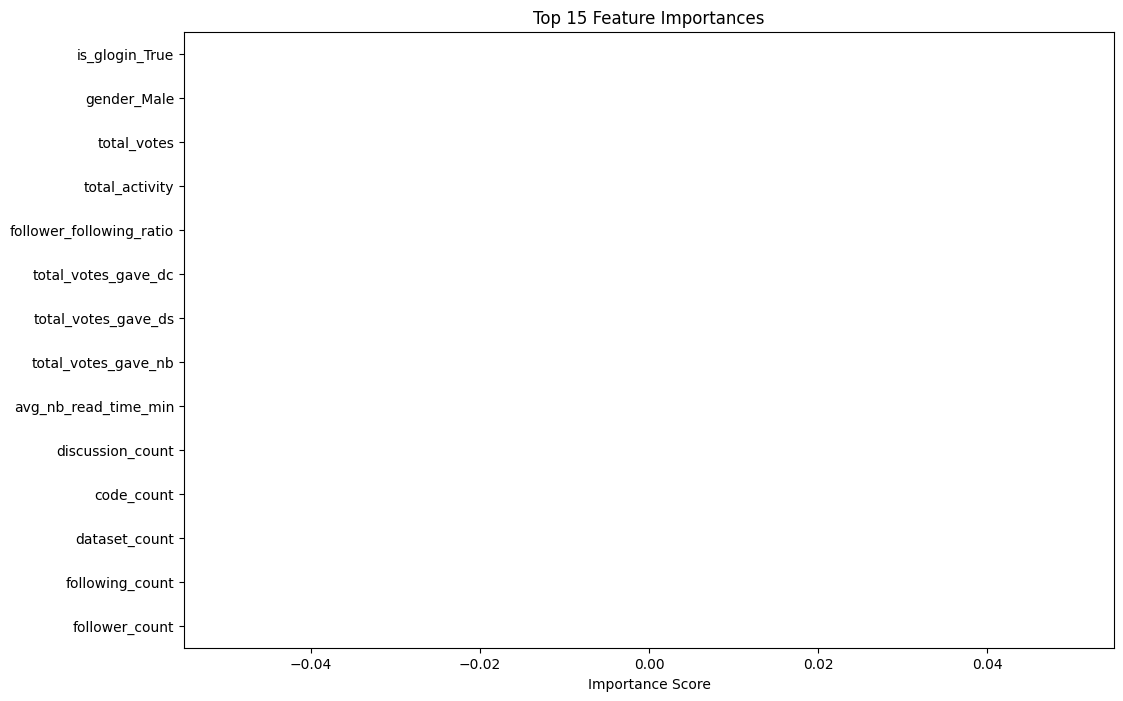

In [27]:
# Cell 24: Visualisasi Feature Importance
# Plot feature importance
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(best_xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance Score')
plt.show()

In [28]:
# Cell 25: Ensemble Learning - Train multiple models
# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=42)
rf_model.fit(X_train, y_train)

# LightGBM
lgb_model = lgb.LGBMClassifier(
    n_estimators=200, 
    learning_rate=0.1, 
    max_depth=7, 
    random_state=42
)
lgb_model.fit(X_train, y_train)

# Voting Classifier (Ensemble)
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('rf', rf_model),
        ('lgb', lgb_model)
    ],
    voting='soft'  # Use predicted probabilities
)
voting_clf.fit(X_train, y_train)

# Evaluate individual models
print("Random Forest performance:")
get_metrics_score(rf_model, X_train, y_train, X_val, y_val)

print("\nLightGBM performance:")
get_metrics_score(lgb_model, X_train, y_train, X_val, y_val)

print("\nVoting Classifier (Ensemble) performance:")
get_metrics_score(voting_clf, X_train, y_train, X_val, y_val)

/home/notsuperganang/Documents/.all/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 745054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1118
[LightGBM] [Info] Number of data points in the train set: 745054, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the 

/home/notsuperganang/Documents/.all/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 745054
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1118
[LightGBM] [Info] Number of data points in the train set: 745054, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the 

/home/notsuperganang/Documents/.all/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/notsuperganang/Documents/.all/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/notsuperganang/Documents/.all/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/notsuper

🔹 Accuracy: Train = 1.0000, Test = 1.0000
🔹 Recall:   Train = 0.0000, Test = 0.0000
🔹 Precision: Train = 0.0000, Test = 0.0000

🔹 Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    248352

    accuracy                           1.00    248352
   macro avg       1.00      1.00      1.00    248352
weighted avg       1.00      1.00      1.00    248352


LightGBM performance:


/home/notsuperganang/Documents/.all/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/notsuperganang/Documents/.all/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/notsuperganang/Documents/.all/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/notsuper

🔹 Accuracy: Train = 1.0000, Test = 1.0000
🔹 Recall:   Train = 0.0000, Test = 0.0000
🔹 Precision: Train = 0.0000, Test = 0.0000

🔹 Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    248352

    accuracy                           1.00    248352
   macro avg       1.00      1.00      1.00    248352
weighted avg       1.00      1.00      1.00    248352


Voting Classifier (Ensemble) performance:


/home/notsuperganang/Documents/.all/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (3, 745054) + inhomogeneous part.

In [ ]:
# Cell 26: Evaluasi final pada test set dengan model terbaik
# Evaluasi model terbaik pada test set
print("Evaluasi XGBoost pada test set:")
get_metrics_score(best_xgb, X_train, y_train, X_test, y_test)
make_confusion_matrix(best_xgb, X_test, y_test)

print("\nEvaluasi Ensemble pada test set:")
get_metrics_score(voting_clf, X_train, y_train, X_test, y_test)
make_confusion_matrix(voting_clf, X_test, y_test)